<a href="https://colab.research.google.com/github/Binabrata/Quantum/blob/main/QuantumTeleportationProtocol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector

In [3]:
# Create random 1-qubit state
psi = random_statevector(2)
print('psi state: {}'.format(psi))

# Display it in LaTeX
array_to_latex(psi)

psi state: Statevector([0.56460641+0.33617229j, 0.22754962+0.71862992j],
            dims=(2,))


<IPython.core.display.Latex object>

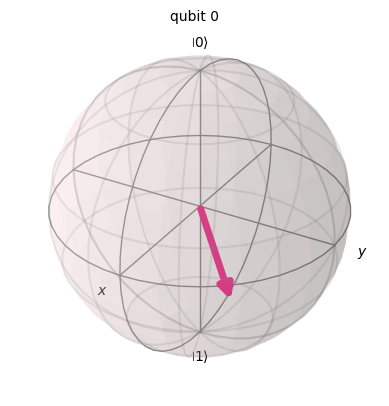

In [4]:
plot_bloch_multivector(psi)

In [5]:
init_state = Initialize(psi)
init_state.label = "initial_state"

In [6]:
# Entangle Generator - Creates Entangled State in quantum circuit qc using qubits q1 & q2
def create_entangle(qc, q1, q2):
    qc.h(q1) # Put qubit q1 into state |+>
    qc.cx(q1, q2) # Apply CNOT with qubit q1 as control and qubit q2 as target

In [7]:
# Alice receives one entangled qubit q1 and also wants to trasport a qubit q0 to Bob
# Alice applies CNOT with qubit q0 as control and qubit q1 as target and then applies H gate on the qubit q0
def alice_gates(qc, q0, q1):
    qc.cx(q0, q1)
    qc.h(q0)

In [8]:
# Alice measures her both the qubits q0 and q1
def measure_and_send(qc, q0, q1):
    qc.measure(q0, 0)
    qc.measure(q1, 1)

In [9]:
# Bob receives the measurement bit string which Alice measures for her qubits
# and then according that measurement bit string Bob applies X and Z gate accordingly.
# Here the values of the ClassicalRegisters (crz & crx) used to decide which gates to apply
def bob_gates(qc, q2, crz, crx):
    qc.x(q2).c_if(crx, 1) # Apply X gate if the crx classical register have the state 1
    qc.z(q2).c_if(crz, 1) # Apply Z gate if the crx classical register have the state 1

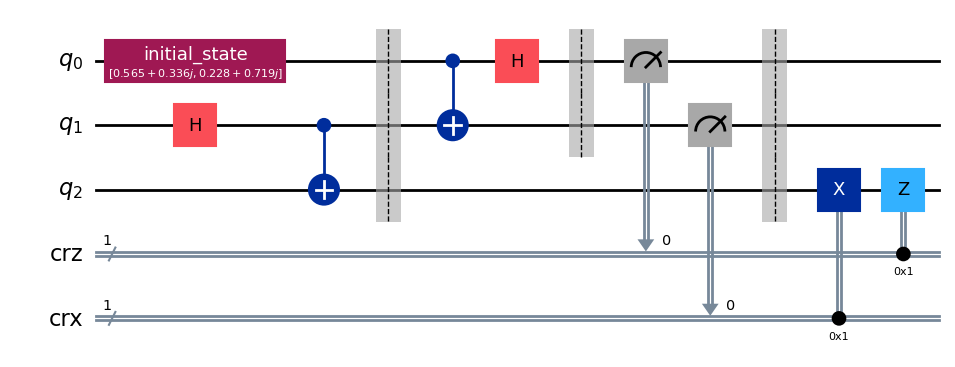

In [10]:
## SETUP - Prepare the circuit (Quantum Teleportation Protocol uses 3 qubits and 2 classical registers)
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0 - Initialize Alice's q0
qc.append(init_state, [0])

## STEP 1 - Create entangled state using the qubits q1 and q2
create_entangle(qc, 1, 2)

qc.barrier()

## STEP 2 - Send entangled qubit q1 to Alice
## Alice applies CNOT gate on that qubit q1 as target and qubit q0 as control
alice_gates(qc, 0, 1)

qc.barrier([0, 1])

## STEP 3 - Alice then sends her classical bits to Bob by measuring both the qubits q0 and q1
measure_and_send(qc, 0, 1)

qc.barrier()

## STEP 4 - Bob applies the X and Z gate based on the classical bit string that Alice sent to him
bob_gates(qc, 2, crz, crx)

# Display the circuit
qc.draw('mpl')


Quantum state is: Statevector([0.   +0.j   , 0.   +0.j   , 0.565+0.336j, 0.   +0.j   ,
             0.   +0.j   , 0.   +0.j   , 0.228+0.719j, 0.   +0.j   ],
            dims=(2, 2, 2))


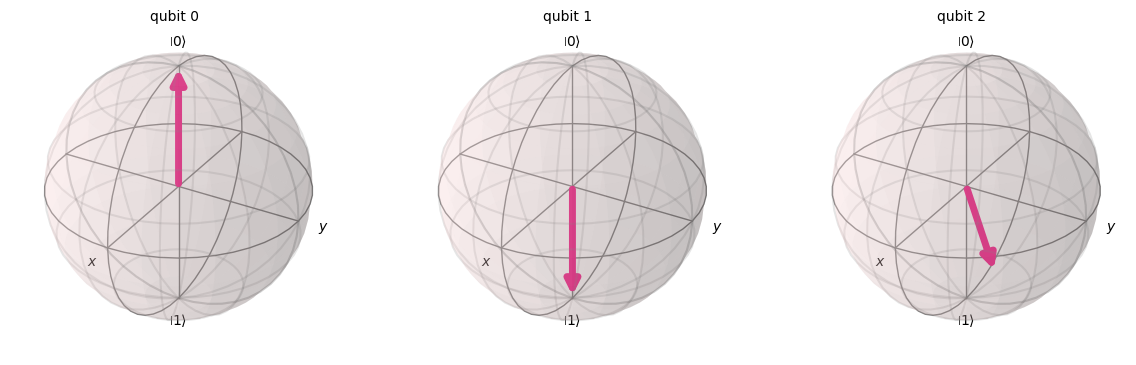

In [11]:
# Test the Quantum Teleportation Protocol

from qiskit import transpile

# To get the eigenvector we should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Transpile and run the circuit
compiled_circuit = transpile(qc, backend)
result = backend.run(compiled_circuit).result().get_statevector(qc, decimals=3)

# Printing the state
print("\nQuantum state is:",result)

# Plotting the Bloch Sphere
plot_bloch_multivector(result)